## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Exploration

In [2]:
raw_data = pd.read_csv("laurel_gen_data.csv")

In [3]:
raw_data.head()

,timestamp,Sum of P kW solar,Sum of P kW KPLC,solar share,Solar Energy (kWh),Grid Energy (kWh)
0,14/09/19 16:00,0.0,72.3,0%,0.00,12.05
1,14/09/19 16:20,4.9,48.9,9%,0.82,8.14
2,14/09/19 16:30,10.0,32.3,24%,1.66,5.38
3,14/09/19 16:40,10.1,20.7,33%,1.69,3.44
4,14/09/19 16:50,7.4,31.6,19%,1.23,5.27


In [4]:
raw_data.tail()

,timestamp,Sum of P kW solar,Sum of P kW KPLC,solar share,Solar Energy (kWh),Grid Energy (kWh)
51936,21/09/20 16:20,27.9,19.1,59%,4.64,3.18
51937,21/09/20 16:30,18.6,27.6,40%,3.11,4.60
51938,21/09/20 16:40,20.2,25.6,44%,3.37,4.27
51939,21/09/20 16:50,15.8,25.0,39%,2.63,4.17
51940,21/09/20 17:00,7.4,36.1,17%,1.24,6.02


In [5]:
raw_data.describe(include="all")

,timestamp,Sum of P kW solar,Sum of P kW KPLC,solar share,Solar Energy (kWh),Grid Energy (kWh)
count,51941,51941.000000,51941.000000,51941,51941.000000,51941.000000
unique,51941,NaN,NaN,102,NaN,NaN
top,14/09/19 16:00,NaN,NaN,0%,NaN,NaN
freq,1,NaN,NaN,27051,NaN,NaN
mean,NaN,20.782788,40.033217,NaN,3.463815,6.672215
std,NaN,33.244585,29.794417,NaN,5.540752,4.965769
min,NaN,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,23.400000,NaN,0.000000,3.890000
50%,NaN,0.000000,31.700000,NaN,0.000000,5.280000
75%,NaN,32.800000,45.800000,NaN,5.460000,7.630000


There's a total of 51941 records from 14/09/2019 to 21/09/2020. No missing data in the fields. 

In [6]:
raw_data.dtypes

timestamp              object
Sum of P kW solar     float64
Sum of P kW KPLC      float64
solar share            object
Solar Energy (kWh)    float64
Grid Energy (kWh)     float64
dtype: object

In [7]:
raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp'].values, dayfirst = True)

In [8]:
raw_data.dtypes

timestamp             datetime64[ns]
Sum of P kW solar            float64
Sum of P kW KPLC             float64
solar share                   object
Solar Energy (kWh)           float64
Grid Energy (kWh)            float64
dtype: object

In [9]:
raw_data.describe(include ="all")

C:\Users\Anarchy\AppData\Local\Temp/ipykernel_5464/799208333.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.describe(include ="all")


,timestamp,Sum of P kW solar,Sum of P kW KPLC,solar share,Solar Energy (kWh),Grid Energy (kWh)
count,51941,51941.000000,51941.000000,51941,51941.000000,51941.000000
unique,51941,NaN,NaN,102,NaN,NaN
top,2019-09-14 16:00:00,NaN,NaN,0%,NaN,NaN
freq,1,NaN,NaN,27051,NaN,NaN
first,2019-09-14 16:00:00,NaN,NaN,NaN,NaN,NaN
last,2020-09-21 17:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.782788,40.033217,NaN,3.463815,6.672215
std,NaN,33.244585,29.794417,NaN,5.540752,4.965769
min,NaN,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,23.400000,NaN,0.000000,3.890000


## Data Visualization

C:\Users\Anarchy\AppData\Local\Temp/ipykernel_5464/2575187493.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  raw_df.set_index('time').drop('timestamp',1)[['Sum of P kW solar']].plot(style='o', ax=ax[1])


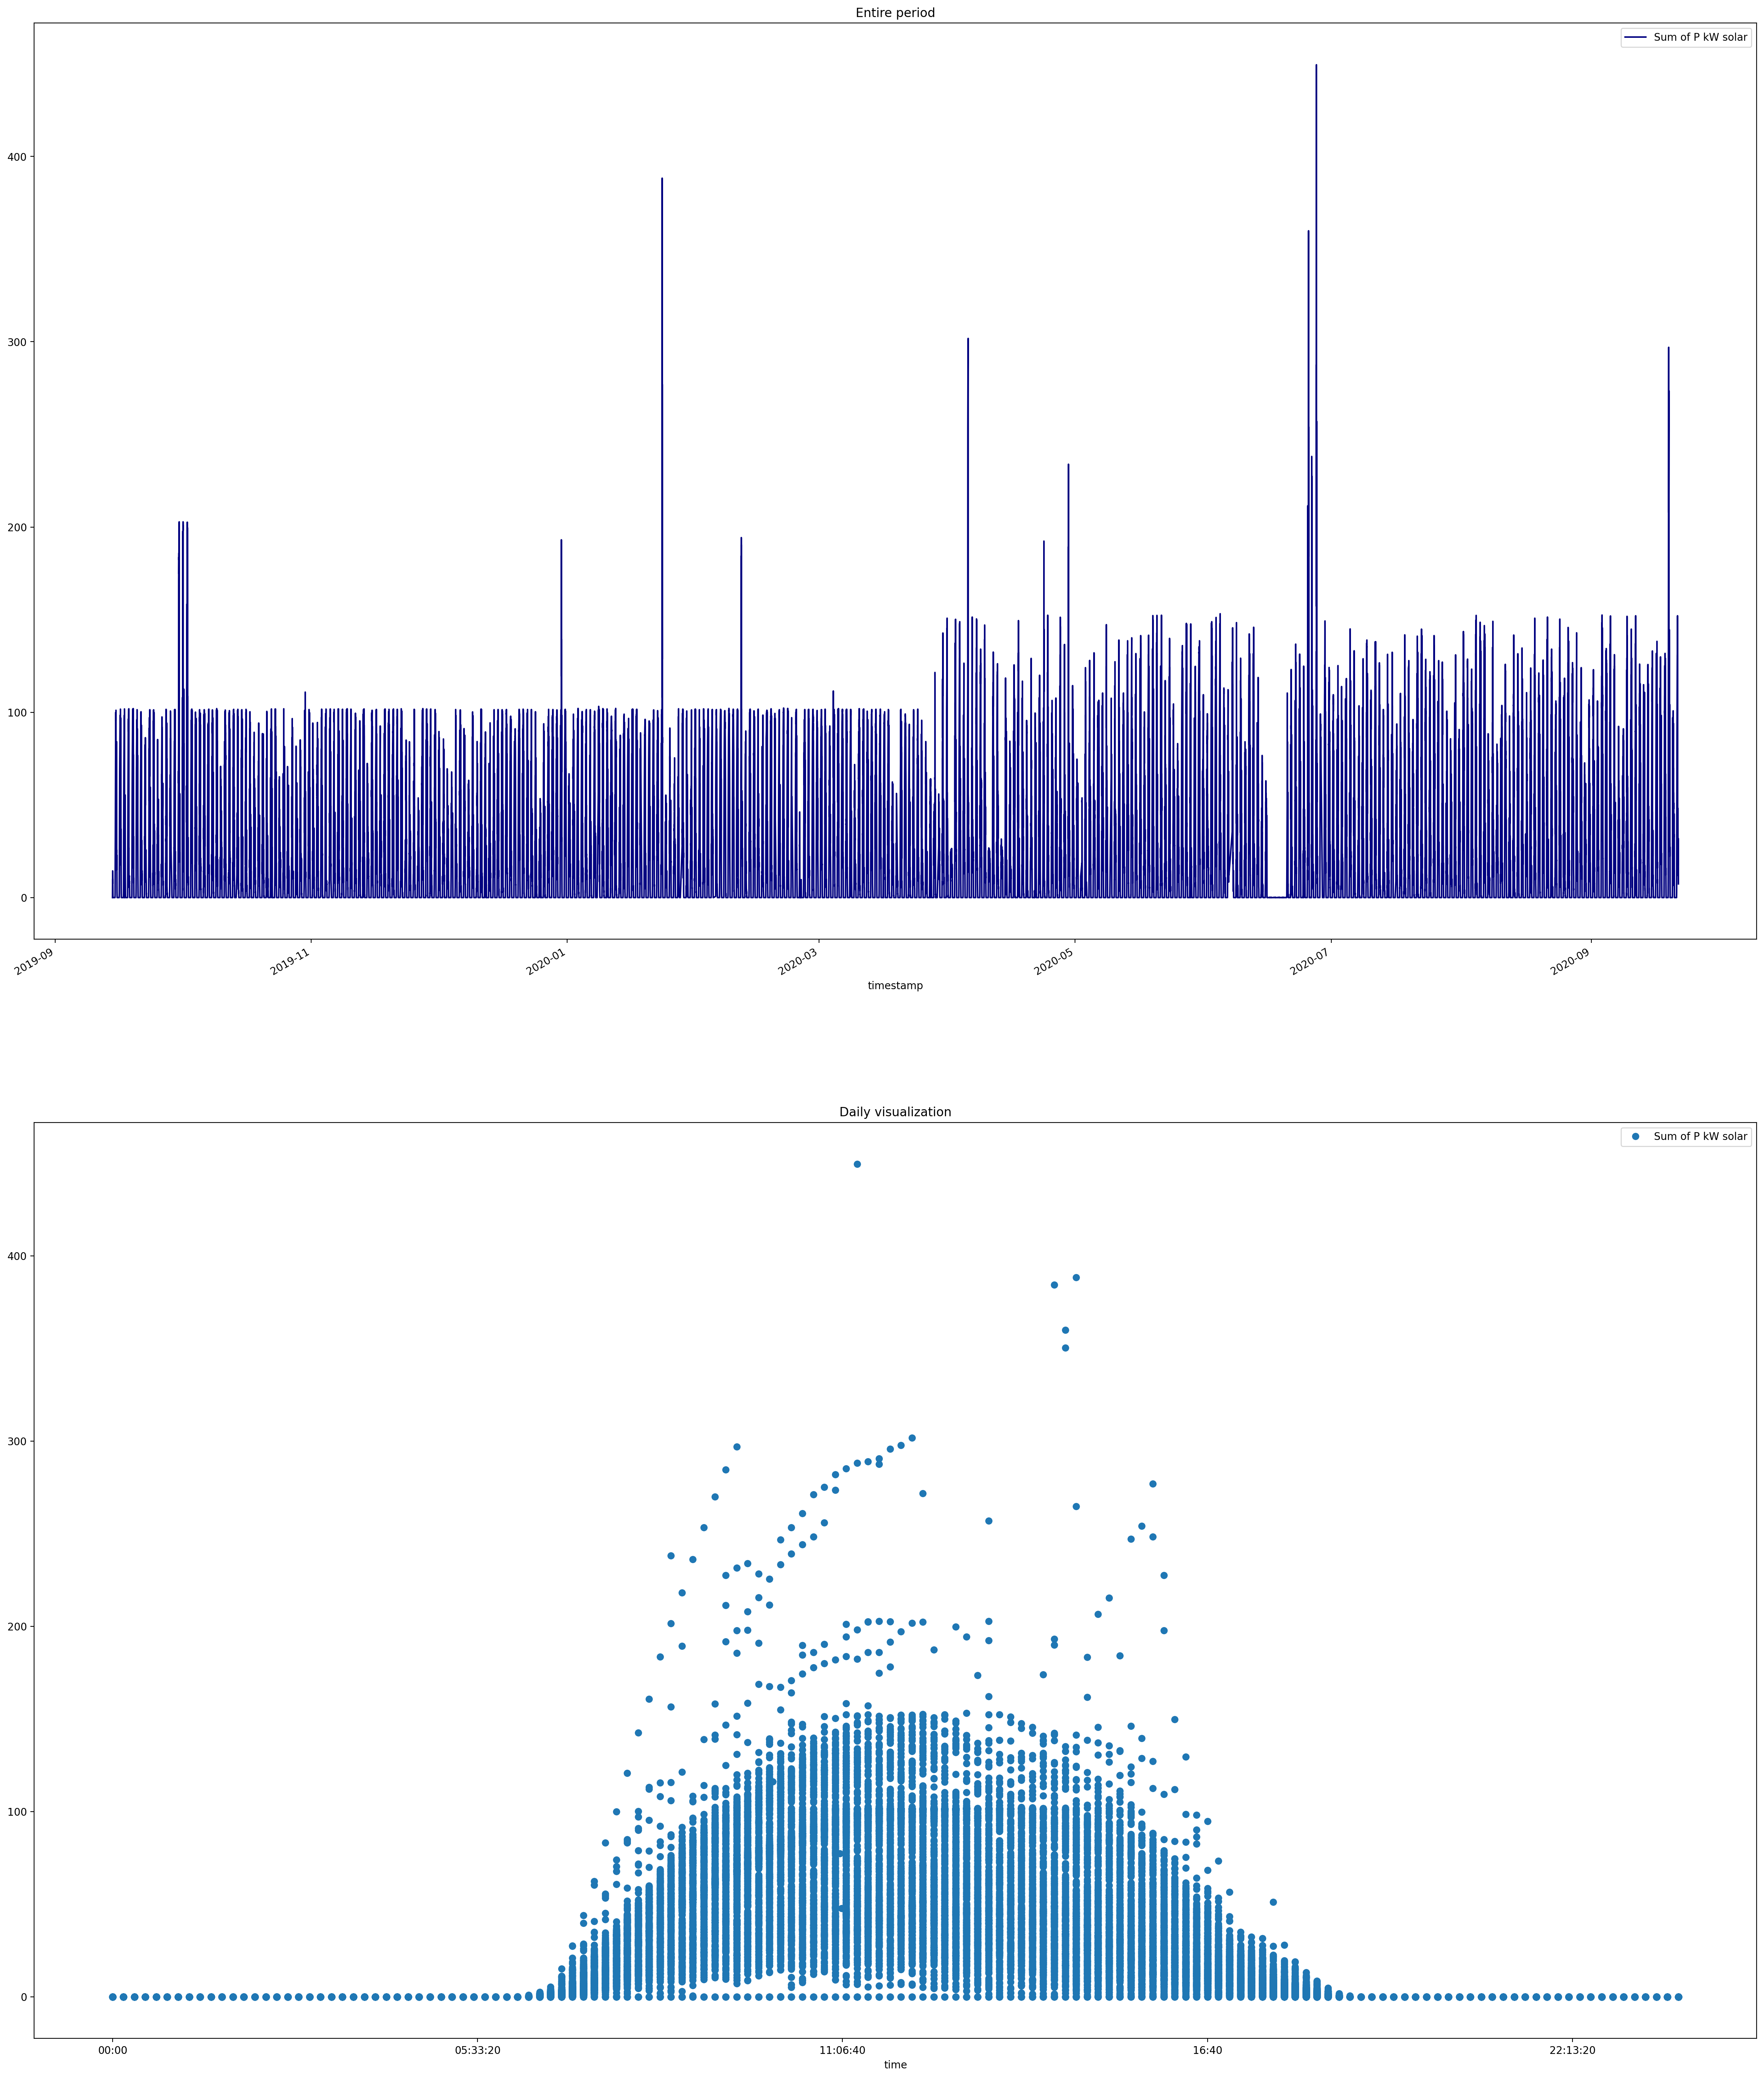

In [10]:
raw_df = raw_data.groupby('timestamp').sum().reset_index()
raw_df['time'] = raw_df['timestamp'].dt.time

fix,ax = plt.subplots(ncols=1,nrows=2,dpi=200, figsize=(30,40))
#Sum of P kW Solar
raw_df.plot(x = 'timestamp',y='Sum of P kW solar', color='navy', ax=ax[0])

#daily
raw_df.set_index('time').drop('timestamp',1)[['Sum of P kW solar']].plot(style='o', ax=ax[1])

ax[0].set_title('Entire period',)
ax[1].set_title('Daily visualization')
plt.show()


## FORECASTING

In [11]:
from pandas.tseries.offsets import DateOffset
! pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

You should consider upgrading via the 'C:\Users\Anarchy\anaconda3\python.exe -m pip install --upgrade pip' command.


In [12]:
pred = raw_data.copy()
pred = pred.groupby('timestamp').sum()
pred = pred['Sum of P kW solar'][-2500:].reset_index()
pred.set_index('timestamp', inplace=True)
pred.head(20)


,Sum of P kW solar
timestamp,
2020-09-04 00:50:00,0.0
2020-09-04 01:00:00,0.0
2020-09-04 01:10:00,0.0
2020-09-04 01:20:00,0.0
2020-09-04 01:30:00,0.0
2020-09-04 01:40:00,0.0
2020-09-04 01:50:00,0.0
2020-09-04 02:00:00,0.0
2020-09-04 02:10:00,0.0


## 1 Testing for Stationarity

In [13]:
result = adfuller(pred['Sum of P kW solar'])
print('ADCF:')
labels = ['ADCF Test statistic','p-value', '#Lags Used','Number of Observations used']

for value, label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <=0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else :
     print("Weak evidence against the null hypothesis, time series has a unit root thus it is non-stationary")
            

ADCF:
ADCF Test statistic : -8.413378970016678
p-value : 2.0747590410331886e-13
#Lags Used : 14
Number of Observations used : 2485
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [14]:
resDiff = sm.tsa.arma_order_select_ic(pred, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\Anarchy\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Anarchy\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

ARMA(p,q) = (2, 4) is the best.


In [15]:
resDiff = sm.tsa.arma_order_select_ic(pred, max_ar=2, max_ma=4, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (2, 4) is the best.


In [16]:
arima = sm.tsa.statespace.SARIMAX(pred,order=(2,0,4),seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()


C:\Users\Anarchy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Anarchy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


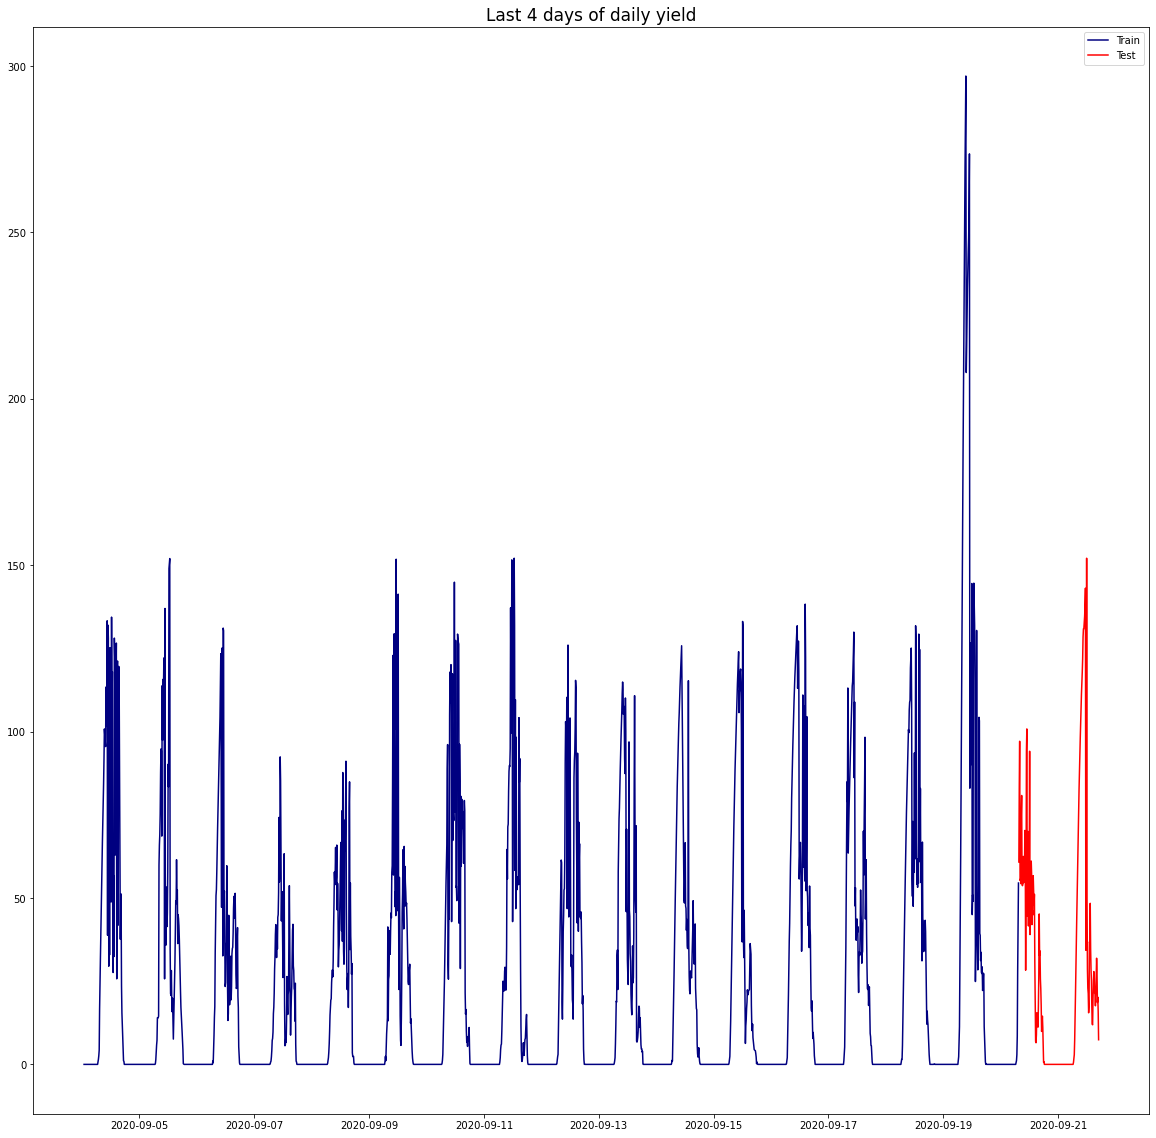

In [17]:
train = pred[:2300]
test = pred[-200:]
plt.figure(figsize=(20,20))
plt.plot(train, label = 'Train', color ='navy')
plt.plot(test, label='Test', color = 'red')
plt.title('Last 4 days of daily yield', fontsize=17)
plt.legend()
plt.show()

In [18]:
future_dates = [test.index[-1] + DateOffset(minutes=x) for x in range (0,5760,10) ]

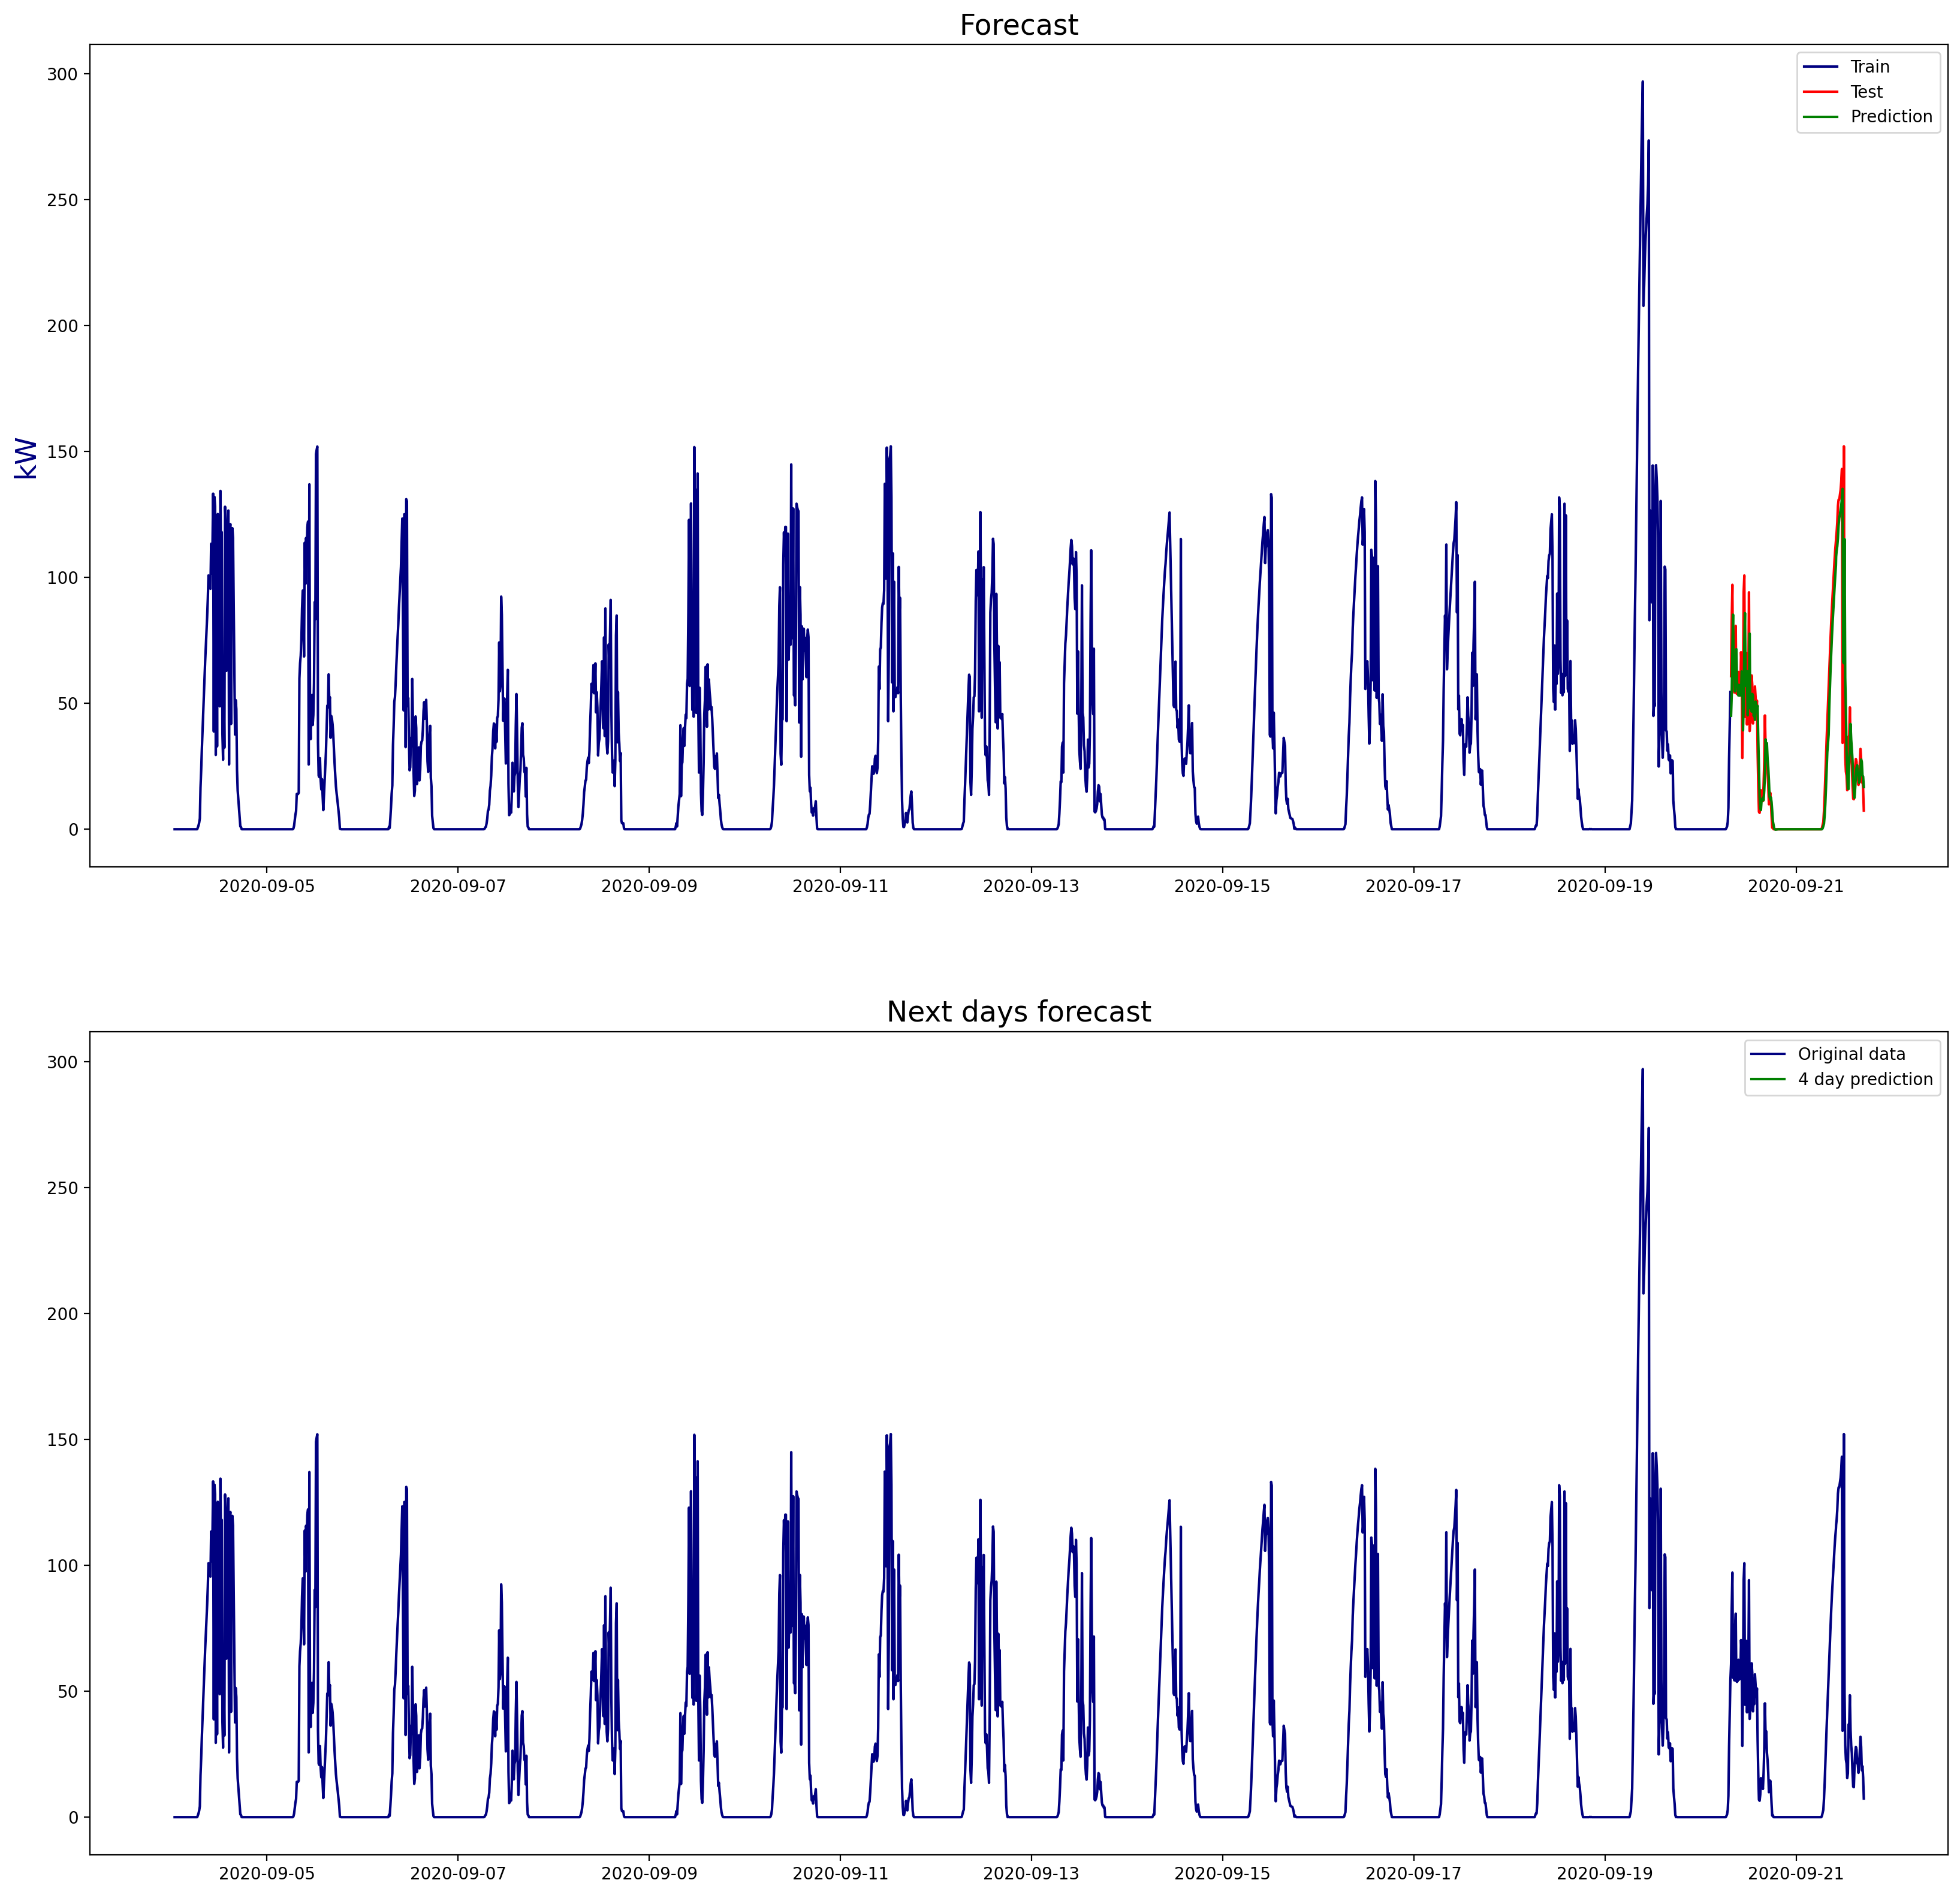

In [19]:
prediction = pd.DataFrame(arima.predict(n_periods=200), index = test.index)
prediction.columns = ['predicted_yield']

fig,ax = plt.subplots(ncols=1,nrows=2, dpi=200, figsize=(20,20))
ax[0].plot(train, label = 'Train', color='navy')
ax[0].plot(test, label = 'Test', color='red')
ax[0].plot(prediction, label = 'Prediction', color ='green')
ax[0].legend()
ax[0].set_title('Forecast', size =17)
ax[0].set_ylabel('kW', color = 'navy', fontsize=17)

f_prediction =pd.DataFrame(arima.predict(n_periods = 576),index=future_dates)
f_prediction.columns = ['predicted_yield']
ax[1].plot(pred, label='Original data', color = 'navy')
ax[1].plot(f_prediction,label='4 day prediction',color='green')
ax[1].legend()
ax[1].set_title('Next days forecast',size=17)
plt.show()


In [20]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Sum of P kW solar   No. Observations:                 2500
Model:               SARIMAX(2, 0, 4)   Log Likelihood              -10515.256
Date:                Sat, 21 May 2022   AIC                          21044.512
Time:                        15:07:13   BIC                          21085.267
Sample:                             0   HQIC                         21059.310
                               - 2500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0894      0.472      2.310      0.021       0.165       2.014
ar.L2         -0.1132      0.460     -0.246      0.806      -1.014       0.788
ma.L1         -0.4468      0.471     -0.948      0.343      -1.370       0.477
ma.L2         -0.0396      0.157     -0.252      0.801      -0.348       0.269
ma.L3          0.0633      0.038      1.672      0.095      -0.011       0.137
ma.L4          0.0152      0.030      0.499      0.618      -0.044       0.075
sigma2       267.8666      3.364     79.622      0.000     261.273     274.460
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             25999.77
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.68
Prob(H) (two-sided):                  0.31   Kurtosis:                        18.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [22]:
print('SARIMAX R2 Score: %f' % (r2_score(prediction['predicted_yield'],test['Sum of P kW solar'])))

SARIMAX R2 Score: 0.815535


In [23]:
print('SARIMAX MAE Score: %f' % (mean_absolute_error(prediction['predicted_yield'],test['Sum of P kW solar'])))

SARIMAX MAE Score: 7.718100


In [24]:
print('SARIMAX RMSE Score: %f' % (mean_squared_error(prediction['predicted_yield'],test['Sum of P kW solar'],squared=False)))

SARIMAX RMSE Score: 15.082161


In [25]:
comp = (prediction['predicted_yield']-test['Sum of P kW solar'])

In [26]:
pd.set_option('display.max_rows', None)
# Default value of display.max_rows is 10 so at max
# 10 rows will be printed. Set it None to display
# all rows in the dataframe
comp

timestamp
2020-09-20 07:40:00   -1.571336e+01
2020-09-20 07:50:00   -2.940011e+01
2020-09-20 08:00:00   -2.532185e+01
2020-09-20 08:10:00    2.992716e+01
2020-09-20 08:20:00    8.018506e+00
2020-09-20 08:30:00    6.935975e+00
2020-09-20 08:40:00   -2.044473e+01
2020-09-20 08:50:00   -1.484595e+01
2020-09-20 09:00:00    1.750596e+01
2020-09-20 09:10:00    4.402554e+00
2020-09-20 09:20:00    2.197719e+00
2020-09-20 09:30:00   -9.369317e+00
2020-09-20 09:40:00    2.719421e+00
2020-09-20 09:50:00   -1.756486e+00
2020-09-20 10:00:00   -2.199649e+00
2020-09-20 10:10:00   -1.701583e+01
2020-09-20 10:20:00   -2.529915e+00
2020-09-20 10:30:00    3.313131e+01
2020-09-20 10:40:00   -1.303774e+01
2020-09-20 10:50:00   -4.462283e+01
2020-09-20 11:00:00   -2.650382e+01
2020-09-20 11:10:00    4.124799e+01
2020-09-20 11:20:00    7.477396e+00
2020-09-20 11:30:00   -1.314088e+01
2020-09-20 11:40:00    2.120217e+01
2020-09-20 11:50:00   -1.065163e+01
2020-09-20 12:00:00   -4.513043e+00
2020-09-20 12:10:0